SUPERMART SALES ANALYSIS

In [8]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

In [20]:
df = pd.read_csv("10000 Sales Records.csv" , encoding = "latin-1")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [22]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Month"] = df["Order Date"].dt.month
df["Day"] = df["Order Date"].dt.dayofweek
df["Year"] = df["Order Date"].dt.year

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Day,Year
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00,1,3,2011
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50,12,0,2015
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95,1,3,2011
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,9,1,2012
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06,10,1,2015


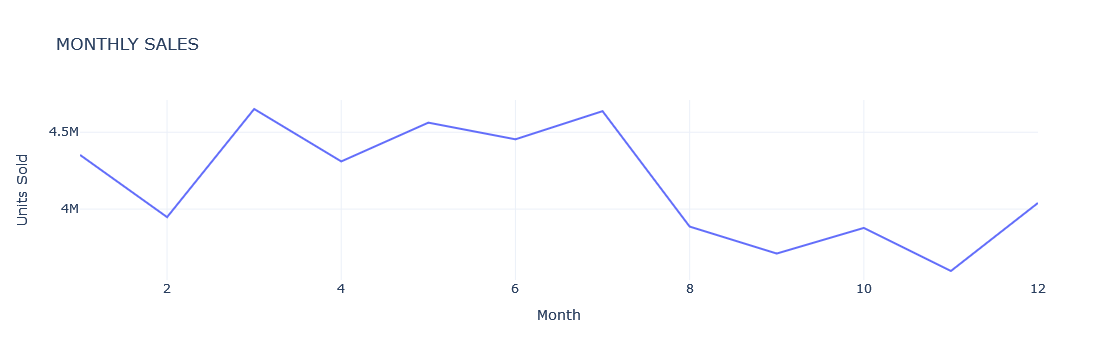

In [37]:
sales_by_month = df.groupby("Month")["Units Sold"].sum().reset_index()
fig = px.line( sales_by_month , x = "Month" , y = "Units Sold" , title = "MONTHLY SALES")
fig.show()

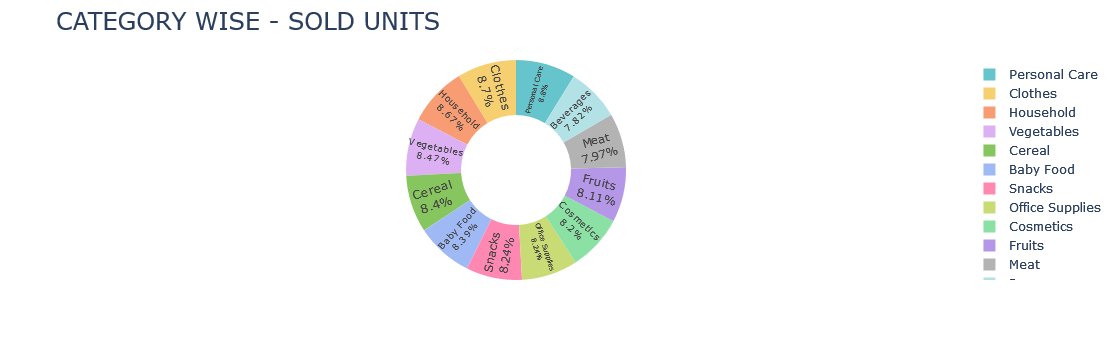

In [51]:
sales_by_cat = df.groupby("Item Type")["Units Sold"].sum().reset_index()
fig = px.pie(sales_by_cat , values = "Units Sold" , names = "Item Type",
            hole = 0.5 , color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(textposition = "inside" , textinfo = "percent+label")
fig.update_layout(title_text = "CATEGORY WISE - SOLD UNITS" , title_font = dict(size=24))
fig.show()

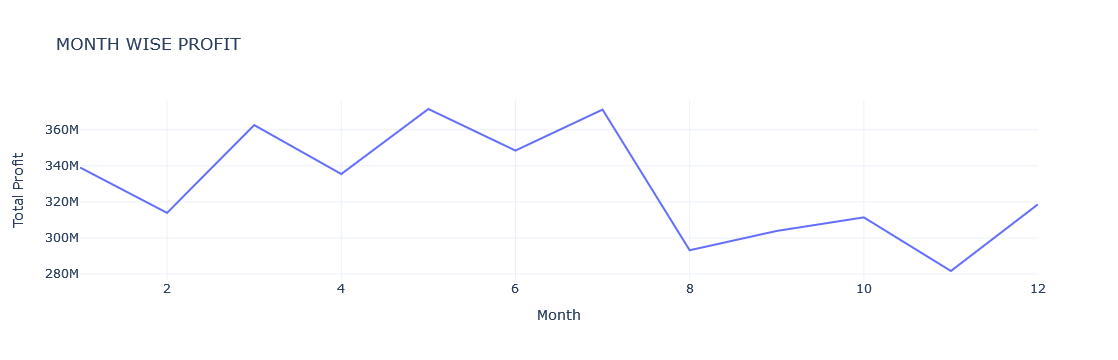

In [53]:
profit_by_month = df.groupby("Month")["Total Profit"].sum().reset_index()
fig1 = px.line(profit_by_month , x = "Month" , y = "Total Profit" , title = "MONTH WISE PROFIT")
fig1.show()

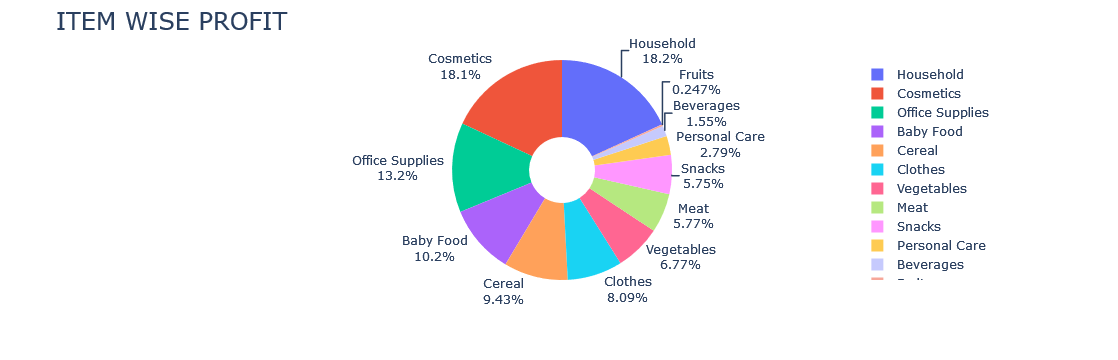

In [68]:
profit_by_cat = df.groupby("Item Type")["Total Profit"].sum().reset_index()
fig2 = px.pie(profit_by_cat , values = "Total Profit" , names = "Item Type",
             hole = 0.3 )
fig2.update_traces(textposition = "outside" , textinfo = "label+percent")
fig2.update_layout(title_text = "ITEM WISE PROFIT" , titlefont =dict(size=24))
fig2.show()

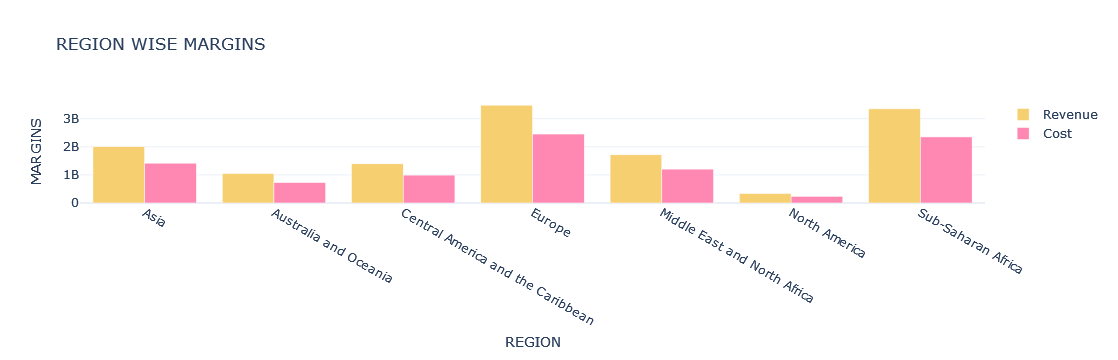

In [100]:
sales_profit_by_priority = df.groupby("Region").agg({"Total Revenue":"sum","Total Cost":"sum"}).reset_index()
color_palette=colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x = sales_profit_by_priority["Region"] , y = sales_profit_by_priority["Total Revenue"],name = "Revenue"  , marker_color = color_palette[1]))
fig.add_trace(go.Bar(x = sales_profit_by_priority["Region"] , y = sales_profit_by_priority["Total Cost"],name = "Cost", marker_color = color_palette[6]))
fig.update_layout(title_text = "REGION WISE MARGINS" , xaxis_title = "REGION",yaxis_title = "MARGINS")
fig.show()